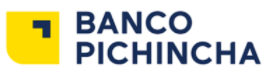






# Prueba práctica 

### La prueba consta de 1 Sección:
### Sección 1: Temas de SQL:  Estos temas fueron elaborados en lenguaje SLQ Lite.

##Preparación ambiente SQL

******************************************************************************************
###  En la siguiente sección encontrará un texto que dice " A LA IZQUIERDA DE ESTA LINEA CONTRARA EL BOTÓN PLAY".  Debe dar clic en ese botón para que pueda configurar el ambiente.
******************************************************************************************



###  Ejecutar la siguiente sección, reiniciara el ambiente y saldra un mensaje de fallo de la sesión, pero es originado por el reinicio necesario para que la configuración tenga efecto

In [ ]:
import os
os.kill(os.getpid(), 9)


### Ejecutar la siguiente sección. si todo  esta correctamente configurado el mensaje "3.22.0" debe aparecer

In [2]:
import sqlite3
print(sqlite3.sqlite_version)

3.22.0


# ----------------------------------------------------------------------------------------------------------

#Inicio prueba práctica

## Sección 1: SQL

###Explicacion ejercicios 1-2-3

###Base de evaluaciones de libros

Se tiene el siguiente base de criticas  de libros y se tiene los puntajes de los evaluadores de varias obras. 

Observe como esta diseñada la base:

Libro ( LID, titulo, anio, escritor )
Nota:  anio = año de publicación del libro

Evaluador(EID , nombre);

Puntaje ( EID, LID, puntaje, FechaEvaluacion )
Nota: El evaluador EID   le dio al libro LID una cantidad de puntos  (1-5) en una determinada fecha  FechaEvaluacion.


Notas importantes:

Sus consultas se ejecutan utilizando SQLite, por lo que debe ajustarse a las construcciones SQL admitidas por SQLite.


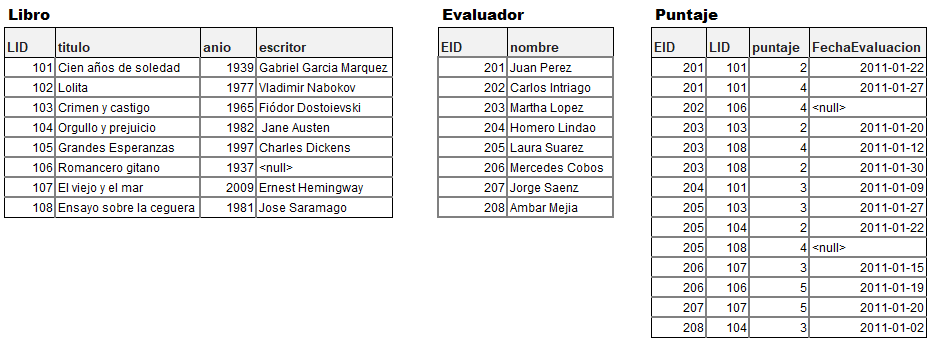

####Ejecutar prerrequisitos ejercicios 1-2-3

In [4]:
## Delete the tables if they already exist 

conn = sqlite3.connect('test.db')
print("Base de datos abierta con exito");

conn.execute('''drop table if exists Libro;''')
conn.execute('''drop table if exists Evaluador;''')
conn.execute('''drop table if exists Puntaje;''')


conn.execute("create table Libro(LID int, titulo text, anio int, escritor text);")
conn.execute("create table Evaluador(EID int, nombre text);")
conn.execute("create table Puntaje(EID int, LID int, puntaje int, FechaEvaluacion date);")


conn.execute("insert into Libro values(101, 'Cien años de soledad', 1939,'Gabriel Garcia Marquez');")
conn.execute("insert into Libro values(102, 'Lolita', 1977,'Vladimir Nabokov');")
conn.execute("insert into Libro values(103, 'Crimen y castigo', 1965,'Fiódor Dostoievski');")
conn.execute("insert into Libro values(104, 'Orgullo y prejuicio', 1982,' Jane Austen');")
conn.execute("insert into Libro values(105, 'Grandes Esperanzas', 1997,'Charles Dickens');")
conn.execute("insert into Libro values(106, 'Romancero gitano', 1937,null);")
conn.execute("insert into Libro values(107, 'El viejo y el mar', 2009,'Ernest Hemingway');")
conn.execute("insert into Libro values(108, 'Ensayo sobre la ceguera', 1981,'Jose Saramago');")

conn.execute("insert into Evaluador values(201, 'Juan Perez');")
conn.execute("insert into Evaluador values(202, 'Carlos Intriago');")
conn.execute("insert into Evaluador values(203, 'Martha Lopez');")
conn.execute("insert into Evaluador values(204, 'Homero Lindao')");
conn.execute("insert into Evaluador values(205, 'Laura Suarez');")
conn.execute("insert into Evaluador values(206, 'Mercedes Cobos');")
conn.execute("insert into Evaluador values(207, 'Jorge Saenz');")
conn.execute("insert into Evaluador values(208, 'Ambar Mejia');")

conn.execute("insert into Puntaje values(201, 101, 2, '2011-01-22');")
conn.execute("insert into Puntaje values(201, 101, 4, '2011-01-27');")
conn.execute("insert into Puntaje values(202, 106, 4, null);")
conn.execute("insert into Puntaje values(203, 103, 2, '2011-01-20');")
conn.execute("insert into Puntaje values(203, 108, 4, '2011-01-12');")
conn.execute("insert into Puntaje values(203, 108, 2, '2011-01-30');")
conn.execute("insert into Puntaje values(204, 101, 3, '2011-01-09');")
conn.execute("insert into Puntaje values(205, 103, 3, '2011-01-27');")
conn.execute("insert into Puntaje values(205, 104, 2, '2011-01-22');")
conn.execute("insert into Puntaje values(205, 108, 4, null);")
conn.execute("insert into Puntaje values(206, 107, 3, '2011-01-15');")
conn.execute("insert into Puntaje values(206, 106, 5, '2011-01-19');")
conn.execute("insert into Puntaje values(207, 107, 5, '2011-01-20');")
conn.execute("insert into Puntaje values(208, 104, 3, '2011-01-02');")


conn.commit()
print("Valores insertados con éxito");


Base de datos abierta con exito
Valores insertados con éxito


####SQL: Pregunta 1: Busque los títulos de todos los libros que tienen puntajes y ordenarlos por el año de menor a mayor.


In [5]:
# Ejercicio # 1
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''select L.titulo as Titulo from Libro L, Puntaje P where L.LID = P.LID order by L.anio asc;''')
for row in cursor:
  print(row)
conn.close()

('Romancero gitano',)
('Romancero gitano',)
('Cien años de soledad',)
('Cien años de soledad',)
('Cien años de soledad',)
('Crimen y castigo',)
('Crimen y castigo',)
('Ensayo sobre la ceguera',)
('Ensayo sobre la ceguera',)
('Ensayo sobre la ceguera',)
('Orgullo y prejuicio',)
('Orgullo y prejuicio',)
('El viejo y el mar',)
('El viejo y el mar',)


####SQL: Pregunta 2: Para cada libro que tenga más de un puntaje registrado, busque la mayor cantidad de puntos que recibió ese libro. Devuelve el título del libro, el evaluador y el puntaje recibido. Ordenar de mayor a menor por el puntaje.


In [6]:
# Ejercicio # 2
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''select L.titulo as LibroNombre, E.nombre as EvaluadorNombre, P.puntaje
from (select P2.LID, COUNT(*) as Count, MAX(P2.puntaje) as MaxPuntaje from Puntaje P2 Group by P2.LID having COUNT(*)>=2) PM
inner join Puntaje P on P.LID=PM.LID and P.puntaje = PM.MaxPuntaje
inner join Evaluador E on E.EID=P.EID
inner join Libro L on L.LID = P.LID;''')
for row in cursor:
  print(row)
conn.close()

('Cien años de soledad', 'Juan Perez', 4)
('Ensayo sobre la ceguera', 'Martha Lopez', 4)
('Crimen y castigo', 'Laura Suarez', 3)
('Ensayo sobre la ceguera', 'Laura Suarez', 4)
('Romancero gitano', 'Mercedes Cobos', 5)
('El viejo y el mar', 'Jorge Saenz', 5)
('Orgullo y prejuicio', 'Ambar Mejia', 3)


####SQL: Pregunta 3: Para el escenario que un evaluador asigno un puntaje al  libro más de una vez, con un puntaje menor en la seguna ocasion, devuelva el nombre del evaluador y el título del libro.


In [9]:
# Ejercicio # 3
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''select L.titulo as LibroNombre, E.nombre as EvaluadorNombre, P.puntaje
from 
(select P2.LID, P2.EID, COUNT(*) as Cantidad, MIN(P2.puntaje) as MinPuntaje, MAX(P2.FechaEvaluacion) as MaxFechaEvaluacion 
	from Puntaje P2 Group by P2.LID, P2.EID having COUNT(*)>=2) PM
inner join Puntaje P on P.LID=PM.LID and P.EID=PM.EID and P.puntaje = PM.MinPuntaje and P.FechaEvaluacion = PM.MaxFechaEvaluacion
inner join Evaluador E on E.EID=P.EID
inner join Libro L on L.LID = P.LID;''')
for row in cursor:
  print(row)
conn.close()

('Ensayo sobre la ceguera', 'Martha Lopez', 2)


SQL: Pregunta 4: Obtener el mínimo  puntaje que ha recibido cada escritor y el evaluador que otorgó esta evaluación 

In [13]:
# Ejercicio # 4
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''select L.escritor, E.nombre as EvaluadorNombre, P.puntaje 
from (select L2.escritor, MIN(P2.puntaje) as MinPuntaje from Puntaje P2 inner join Libro L2 on P2.LID=L2.LID Group by L2.escritor) PM 
inner join Libro L on L.escritor = PM.escritor
inner join Puntaje P on L.LID=P.LID and P.puntaje=PM.MinPuntaje
inner join Evaluador E on E.EID = P.EID;''')
for row in cursor:
  print(row)

(' Jane Austen', 'Laura Suarez', 2)
('Ernest Hemingway', 'Mercedes Cobos', 3)
('Fiódor Dostoievski', 'Martha Lopez', 2)
('Gabriel Garcia Marquez', 'Juan Perez', 2)
('Jose Saramago', 'Martha Lopez', 2)


#### Explicación Ejercicio 5  Red Social

Adolescentes de un vecidario de su barrio han decidido averiguar ciertos datos comunes de amistad utilizando bases de datos. Se reunieron y averiguaron ciertos nexos entre dieciséis jovenes en los grados 9,10,11,12. Aquí está el esquema:

Highschooler (ID, nombre, grado)
Nota: Hay un estudiante de secundaria con una identificación única (ID) y un nombre de pila (first name) en un grado (grade) determinado.

Friend  (ID1, ID2)
Nota: El estudiante con ID1 es amigo del estudiante con ID2. La amistad es mutua, por lo que si (123, 456) está en la tabla Friend, también lo está (456, 123).

Likes  (ID1, ID2)
Inglés: Al estudiante con ID1 le agrada el estudiante con ID2. Darle me gusta a alguien no es necesariamente mutuo, por lo que si (123, 456) está en la tabla Likes, no hay garantía de que (456, 123) también esté presente.

Para su conveniencia, aquí hay un gráfico que muestra las diversas conexiones entre los jovenes en nuestra base de datos. Los de 9º grado son azules, los de 10º grado son verdes, los de 11º grado son amarillos y los de 12º grado son morados. Los bordes negros no dirigidos indican amistades y los bordes rojos dirigidos indican que a un estudiante le gusta otro estudiante.

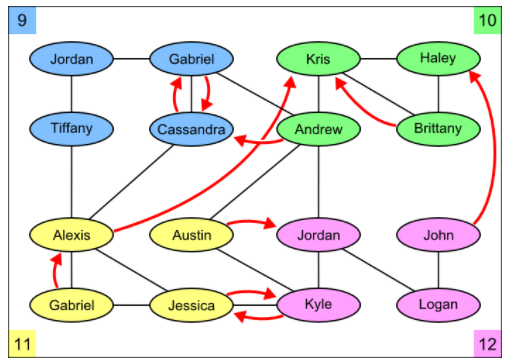

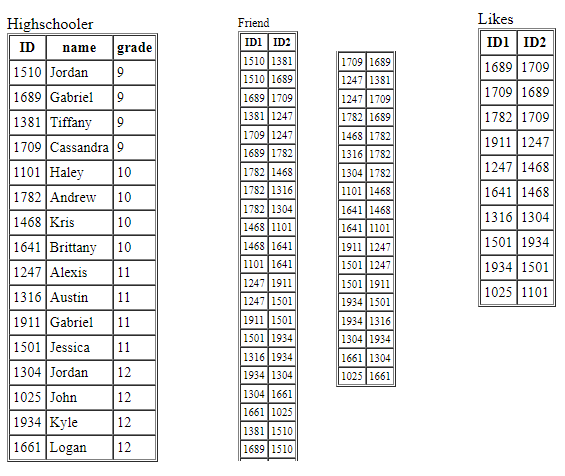

#### Ejecutar prerrequisitos tema 5

In [14]:
# Delete the tables if they already exist 
conn = sqlite3.connect('test.db')
print("Base de datos abierta con exito");

conn.execute('''drop table if exists Highschooler;''')
conn.execute('''drop table if exists Friend;''')
conn.execute('''drop table if exists Likes;''')



# Create the schema for our tables 
conn.execute("create table Highschooler(ID int, name text, grade int);")
conn.execute("create table Friend(ID1 int, ID2 int);")
conn.execute("create table Likes(ID1 int, ID2 int);")

# Populate the tables with our data 
conn.execute("insert into Highschooler values (1510, 'Jordan', 9);")
conn.execute("insert into Highschooler values (1689, 'Gabriel', 9);")
conn.execute("insert into Highschooler values (1381, 'Tiffany', 9);")
conn.execute("insert into Highschooler values (1709, 'Cassandra', 9);")
conn.execute("insert into Highschooler values (1101, 'Haley', 10);")
conn.execute("insert into Highschooler values (1782, 'Andrew', 10);")
conn.execute("insert into Highschooler values (1468, 'Kris', 10);")
conn.execute("insert into Highschooler values (1641, 'Brittany', 10);")
conn.execute("insert into Highschooler values (1247, 'Alexis', 11);")
conn.execute("insert into Highschooler values (1316, 'Austin', 11);")
conn.execute("insert into Highschooler values (1911, 'Gabriel', 11);")
conn.execute("insert into Highschooler values (1501, 'Jessica', 11);")
conn.execute("insert into Highschooler values (1304, 'Jordan', 12);")
conn.execute("insert into Highschooler values (1025, 'John', 12);")
conn.execute("insert into Highschooler values (1934, 'Kyle', 12);")
conn.execute("insert into Highschooler values (1661, 'Logan', 12);")

conn.execute("insert into Friend values (1510, 1381);")
conn.execute("insert into Friend values (1510, 1689);")
conn.execute("insert into Friend values (1689, 1709);")
conn.execute("insert into Friend values (1381, 1247);")
conn.execute("insert into Friend values (1709, 1247);")
conn.execute("insert into Friend values (1689, 1782);")
conn.execute("insert into Friend values (1782, 1468);")
conn.execute("insert into Friend values (1782, 1316);")
conn.execute("insert into Friend values (1782, 1304);")
conn.execute("insert into Friend values (1468, 1101);")
conn.execute("insert into Friend values (1468, 1641);")
conn.execute("insert into Friend values (1101, 1641);")
conn.execute("insert into Friend values (1247, 1911);")
conn.execute("insert into Friend values (1247, 1501);")
conn.execute("insert into Friend values (1911, 1501);")
conn.execute("insert into Friend values (1501, 1934);")
conn.execute("insert into Friend values (1316, 1934);")
conn.execute("insert into Friend values (1934, 1304);")
conn.execute("insert into Friend values (1304, 1661);")
conn.execute("insert into Friend values (1661, 1025);")
conn.execute("insert into Friend select ID2, ID1 from Friend;")

conn.execute("insert into Likes values(1689, 1709);")
conn.execute("insert into Likes values(1709, 1689);")
conn.execute("insert into Likes values(1782, 1709);")
conn.execute("insert into Likes values(1911, 1247);")
conn.execute("insert into Likes values(1247, 1468);")
conn.execute("insert into Likes values(1641, 1468);")
conn.execute("insert into Likes values(1316, 1304);")
conn.execute("insert into Likes values(1501, 1934);")
conn.execute("insert into Likes values(1934, 1501);")
conn.execute("insert into Likes values(1025, 1101);")

conn.commit()
print("Valores insertados con éxito");


Base de datos abierta con exito
Valores insertados con éxito


#### SQL: Pregunta 5: Para cada estudiante A al que le guste (like) un estudiante B donde los dos no son amigos (friend), averigüe si tienen un amigo C en común (¡quién puede presentarlos!). Para todos esos tríos, devuelva el nombre y el grado (grade) de A, B y C.


In [17]:
# Ejercicio # 5
conn = sqlite3.connect('test.db')


####PROGRAME SU RESPUESTA DENTRO DEL CONN.EXECUTE ENTRE LAS COMILLAS

cursor = conn.execute('''Select 
HA.name as "A_Name", HA.grade as "A_Grade",
HB.name as "B_Name", HB.grade as "B_Grade",
HC.name as "C_Name", HC.grade as "C_Grade"
from Likes L
Inner join Friend C1 on L.ID1 = C1.ID1 --AMIGOS 1
Inner join Friend C2 on L.ID2 = C2.ID1 --AMIGOS 2
Inner join Highschooler HA on HA.ID = L.ID1
Inner join Highschooler HB on HB.ID = L.ID2
Inner join Highschooler HC on HC.ID = C1.ID2
where 
not exists(select 1 from Friend F where F.ID1=L.ID1 and F.ID2=L.ID2)
AND
not exists(select 1 from Friend F where F.ID1=L.ID2 and F.ID2=L.ID1)
AND C1.ID2=C2.ID2;''')
for row in cursor:
  print(row)
conn.close()

('Andrew', 10, 'Cassandra', 9, 'Gabriel', 9)
('Austin', 11, 'Jordan', 12, 'Andrew', 10)
('Austin', 11, 'Jordan', 12, 'Kyle', 12)
